# Abstract

# Part A: Implement Perceptron

In this section, I will be utilizing my perceptron algorithm contained in the file perceptron.py on arbitrary linearly-separable data, to ensure that my implementation works properly.

In [265]:
%load_ext autoreload
%autoreload 2
from perceptron import Perceptron, PerceptronOptimizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Here is my linearly-separable data to check my perceptron implementation.

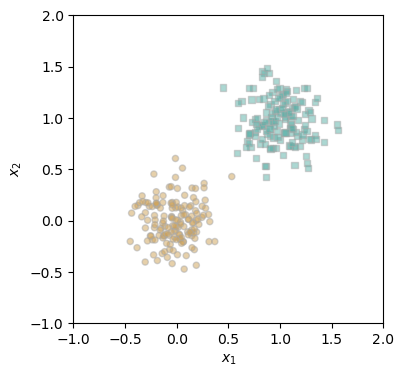

In [266]:
import torch
from matplotlib import pyplot as plt

torch.manual_seed(1234)

def perceptron_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)

    # convert y from {0, 1} to {-1, 1}
    y = 2*y - 1
    y = y.type(torch.FloatTensor)
    return X, y

def plot_perceptron_data(X, y, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [-1, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = y[ix], facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

X, y = perceptron_data(n_points = 300, noise = 0.2)

fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.set(xlim = (-1, 2), ylim = (-1, 2))
plot_perceptron_data(X, y, ax)

Here I am running my perceptron algorithm on the data, and printing the loss at each iteration. We can see how the loss begins at 0.5, and decreases until it reaches 0, where my algorithm has terminated upon finding a separating line between the two classes.

In [267]:

# instantiate a model and an optimizer
p = Perceptron() 
opt = PerceptronOptimizer(p)

loss = 1.0

# for keeping track of loss values
loss_vec = []

n = X.size()[0]

while loss > 0.0: # dangerous -- only terminates if data is linearly separable
    
    # not part of the update: just for tracking our progress    
    loss = p.loss(X, y) 
    loss_vec.append(loss)
    
    # pick a random data point
    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]

    
    # perform a perceptron update using the random data point
    opt.step(x_i, y_i)

print(loss_vec)

[tensor(0.5000), tensor(0.5000), tensor(0.0900), tensor(0.0900), tensor(0.0900), tensor(0.0900), tensor(0.0900), tensor(0.0900), tensor(0.0900), tensor(0.0900), tensor(0.0900), tensor(0.0900), tensor(0.0900), tensor(0.0900), tensor(0.0900), tensor(0.0900), tensor(0.0900), tensor(0.0900), tensor(0.0900), tensor(0.2600), tensor(0.2600), tensor(0.1700), tensor(0.1700), tensor(0.1700), tensor(0.1700), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(0.0033), tensor(

Here is a visualization showing the loss at each iteration of the perceptron update.

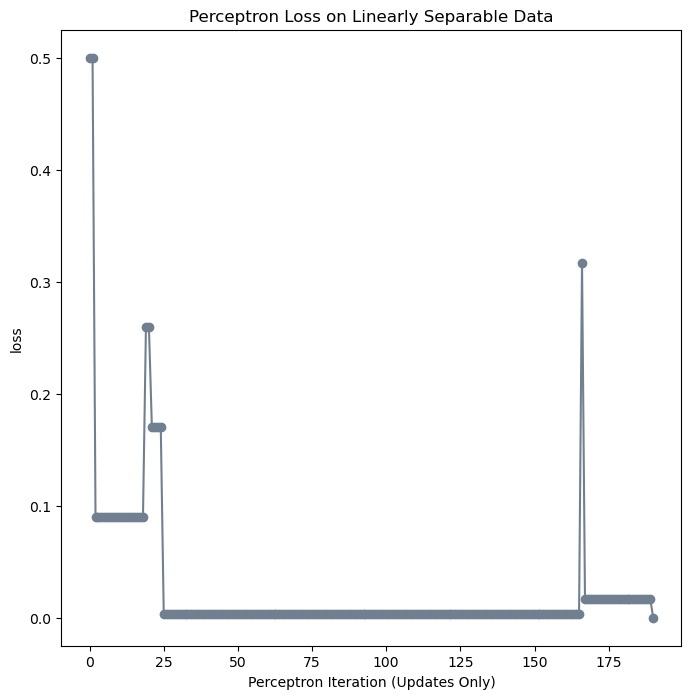

In [268]:
plt.figure(figsize= (8,8))
plt.plot(loss_vec, color = "slategrey")

plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")

labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss", title = "Perceptron Loss on Linearly Separable Data")

# Part B: Experiments

In this section, I will be using the famous linearly-separable Iris data set from R.A. Fisher's 1936 paper [The Use of Multiple Measurements in Taxonomic Problems](https://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/). This data set contains three iris species, each with 50 samples and multiple features for each data point. One species of iris is linearly separable from the other two. I will be illustrating the following claims concerning perceptron algorithms:
1. When using 2D data, if the data is linearly separable, then the perceptron will converge to weight vector **w** that describes a separating line.
2. When using 2D data, if the data is **not** linearly separable, the perceptron algorithm will not settle on a final value of **w**, but will instead run until the maximum number of iterations is reached, without achieving perfect accuracy (assumption that 1000 iterations is sufficient).
3. The perceptron algorithm will be able to work in more than 2 dimensions of data. I will show this by running my algorithm on data with at least 5 features.

First, I will load the Iris dataset into the Jupyter Notebook.

In [269]:
import pandas as pd
df = pd.read_csv('Iris.csv')
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [270]:
import seaborn as sns
import matplotlib.pyplot as plt

In the following visualization, we can see that the Setosa species of Iris flower is linearly separable from the other two species (Versicolor and Virginica), when looking at the features Sepal Length and Petal Length. We can also see that using these two features, that the Versicolor and Virginica species are not linearly separable from one another. Since we are only using two features, we can consider this data to be 2 dimensional. Thus, we will try to prove our first two claims using the Sepal Length and Petal Length features of this dataset.

<Axes: title={'center': 'Sepal Length vs. Petal Length'}, xlabel='Sepal Length (cm)', ylabel='Petal Length (cm)'>

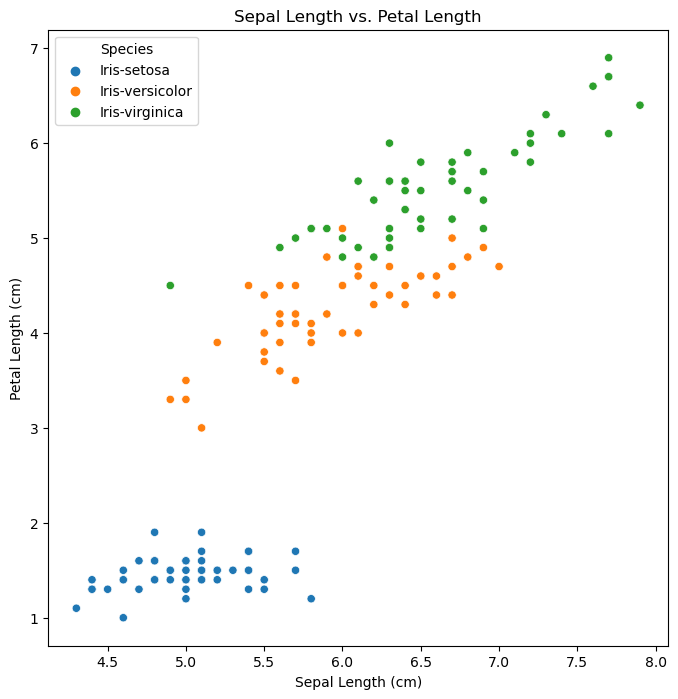

In [271]:
fig, ax = plt.subplots(figsize=(8, 8))

plot1 = sns.scatterplot(data= df, x= 'SepalLengthCm', y= 'PetalLengthCm', hue= 'Species', ax= ax)
plot1.set(xlabel= 'Sepal Length (cm)', ylabel= 'Petal Length (cm)', title= "Sepal Length vs. Petal Length")
plot1

Now to prep our data. We will only be considering the features Sepal Length and Petal Length in our first two claims. Additionally, since we want to see whether one class is linearly separable from the other two, we will transform the 'Species' feature into a binary value representing whether the given Iris data point is of the Setosa species or not.

In [272]:
x1 = torch.tensor(df['SepalLengthCm'].values)
x2 = torch.tensor(df['PetalLengthCm'].values)
bias = torch.ones(x1.shape[0])
X = torch.stack((x1, x2, bias), -1)

species_setosa = df['Species'] == 'Iris-setosa'
y = torch.from_numpy(species_setosa.values)

X = X.type(torch.FloatTensor)
y = y.type(torch.FloatTensor)

y = torch.where(y == 1.0, 1.0, -1.0)


In [273]:
def draw_line(w, x_min, x_max, ax, **kwargs):
    w_ = w.flatten()
    x = torch.linspace(x_min, x_max, 100)
    y = -(w_[0]*x + w_[2])/w_[1]
    l = ax.plot(x,y,**kwargs)

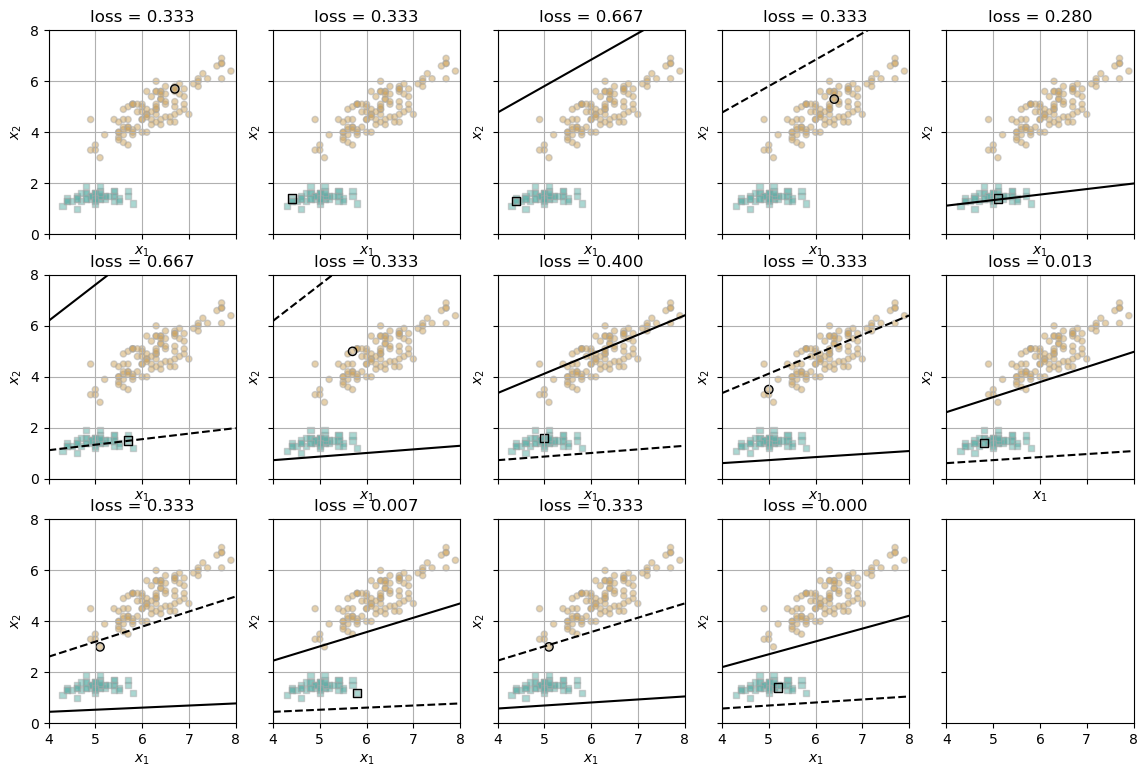

In [274]:
torch.manual_seed(2)

# instantiate a model and an optimizer
p = Perceptron() 
opt = PerceptronOptimizer(p)
p.loss(X, y)

# set up the figure
plt.rcParams['figure.figsize'] = (14, 9)
fig, axarr = plt.subplots(3, 5, sharex= True, sharey= True)
markers = ['o', ',']
marker_map = {-1 : 0, 1 : 1}

current_ax = 0
loss = 1.0
max_iter = 1000

# for keeping track of loss values
loss_vec = []

curr_iter = 0

while loss > 0.0 and curr_iter < max_iter: #if data is not linearly separable, terminates after 1000 iterations
    
    ax = axarr.ravel()[current_ax]

    # save old value of w for plotting
    old_w = torch.clone(p.w)
    
    # update step on random data point
    rand_point = torch.randint(X.shape[0], size = (1,))
    x_i = X[[rand_point],:]
    y_i = y[rand_point]
    local_loss = opt.step(x_i, y_i)

    # if change was made, plot old and new decision boundaries
        # adds new loss to loss_vec for plotting
    if local_loss > 0:
        plot_perceptron_data(X, y, ax)
        draw_line(old_w, x_min = 4, x_max = 8, ax = ax, color = 'black', linestyle = 'dashed')
        loss = p.loss(X, y).item()
        loss_vec.append(loss)
        draw_line(torch.clone(p.w), x_min = 4, x_max = 8, ax = ax, color = 'black')
        ax.scatter(X[rand_point, 0], X[rand_point, 1], color = 'black', facecolors = 'none', edgecolors = 'black', marker = markers[marker_map[y[rand_point].item()]])
        ax.set_title(f'loss = {loss:.3f}')
        ax.set(xlim = (4, 8), ylim = (0, 8))
        ax.grid(True)
        current_ax += 1
    curr_iter += 1
    plt.tight_layout

Now, we will do that again on data that is not linearly separable, that is, when the predictive class is either the Versicolor or Virginica species of Iris flower (we will use the Versicolor arbitrarily here).

In [275]:
'''
x1 = torch.tensor(df['SepalLengthCm'].values)
x2 = torch.tensor(df['PetalLengthCm'].values)
bias = torch.ones(x1.shape[0])
X = torch.stack((x1, x2, bias), -1)
'''

species_versicolor = df['Species'] == 'Iris-versicolor'
y2 = torch.from_numpy(species_versicolor.values)

#X = X.type(torch.FloatTensor)
y2 = y2.type(torch.FloatTensor)

y2 = torch.where(y2 == 1.0, 1.0, -1.0)

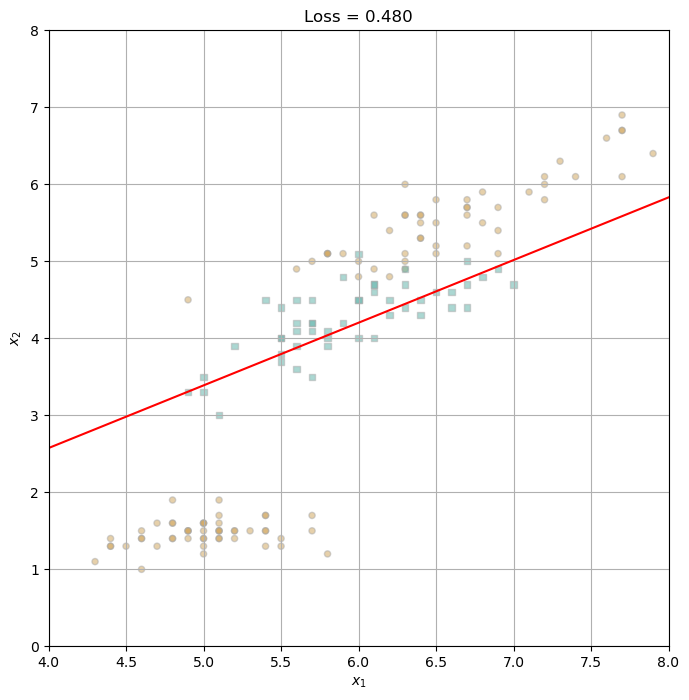

In [276]:
torch.manual_seed(34)

# instantiate a model and an optimizer
p2 = Perceptron() 
opt2 = PerceptronOptimizer(p2)

loss = p2.loss(X, y2).item()
max_iter = 1000

# for keeping track of loss values
loss_vec = []

n = X.shape[0]
curr_iter = 0

ultimate_w = torch.zeros_like(p2.w)

while loss > 0.0 and curr_iter <= max_iter: #if data is not linearly separable, terminates after 1000 iterations
    
    # update step on random data point
    rand_point = torch.randint(n, size = (1,))
    x_i = X[[rand_point],:]
    y2_i = y2[rand_point]
    opt2.step(x_i, y2_i)

    loss = p2.loss(X, y2).item()
    loss_vec.append(loss)

    if curr_iter == max_iter:
        ultimate_w = torch.clone(p2.w)

    curr_iter += 1

fig, ax = plt.subplots(1, 1, figsize = (8, 8))
ax.set(xlim = (4, 8), ylim = (0, 8))
ax.set_title(f'Loss = {loss:.3f}')
ax.grid(True)
plot_perceptron_data(X, y2, ax)
draw_line(ultimate_w, x_min = 2, x_max = 8, ax = ax, color = "red")

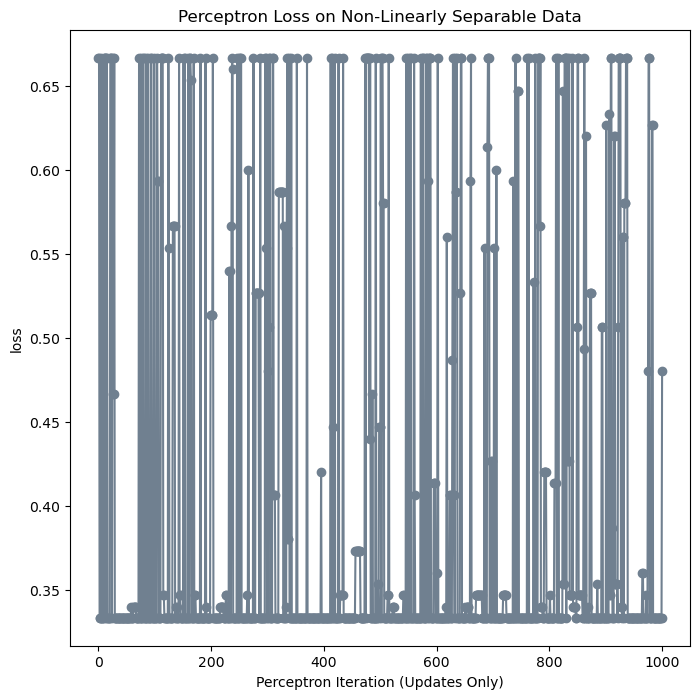

In [277]:
plt.figure(figsize= (8,8))
plt.plot(loss_vec, color = "slategrey")

plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")

labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss", title = "Perceptron Loss on Non-Linearly Separable Data")

In [278]:
x1 = torch.tensor(df['SepalLengthCm'].values)
x2 = torch.tensor(df['PetalLengthCm'].values)
x3 = torch.tensor(df['SepalWidthCm'].values)
x4 = torch.tensor(df['PetalWidthCm'].values)
x5 = torch.zeros(x1.shape[0]) #arbitrary feature to create a fifth feature
bias = torch.ones(x1.shape[0])

X = torch.stack((x1, x2, x3, x4, x5, bias), -1)

species_setosa = df['Species'] == 'Iris-setosa'
y = torch.from_numpy(species_setosa.values)

X = X.type(torch.FloatTensor)
y = y.type(torch.FloatTensor)

y = torch.where(y == 1.0, 1.0, -1.0)

In [279]:
# instantiate a model and an optimizer
p3 = Perceptron() 
opt3 = PerceptronOptimizer(p3)

loss = p3.loss(X, y).item()
max_iter = 1000

# for keeping track of loss values
loss_vec = []

n = X.shape[0]
curr_iter = 0

while loss > 0.0 and curr_iter <= max_iter: #if data is not linearly separable, terminates after 1000 iterations
    
    # update step on random data point
    rand_point = torch.randint(n, size = (1,))
    x_i = X[[rand_point],:]
    y_i = y[rand_point]
    opt3.step(x_i, y_i)

    loss = p3.loss(X, y).item()
    loss_vec.append(loss)

    curr_iter += 1

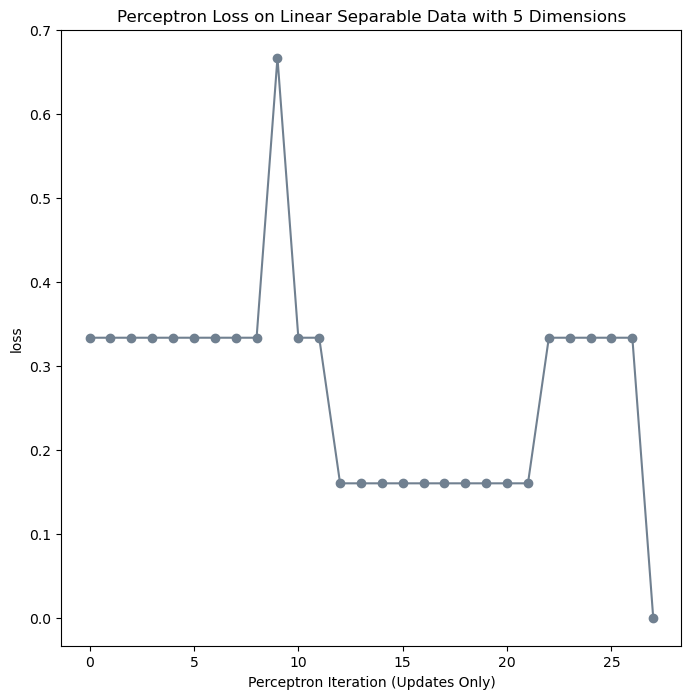

In [280]:
plt.figure(figsize= (8,8))
plt.plot(loss_vec, color = "slategrey")

plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")

labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss", title = "Perceptron Loss on Linear Separable Data with 5 Dimensions")

# Part C: Minibatch Perceptron


# Part D: Writing